# Data Science with pandas (part 2)

## Combining data frames

In many real life cases, you may find data saved into different files and, therefore, you may need to deal with several different pandas DataFrames. In the previous session, we saw how can we easily run statistical analysis on a single DataFrame, so, ideally, we would like to have all the relevant data for our analysis inside a single DataFrame. <br>
In this session we will explore different ways of combining DataFrames into a single DataFrame.

Let's start loading the pandas library, reading two data sets into pandas DataFrames, and having a quick look at the tabular data: ```surveys.csv``` and ```species.csv```

In [3]:
import pandas as pd

In [3]:
surveys_df = pd.read_csv("../data/surveys.csv", keep_default_na=False, na_values=[""])
species_df = pd.read_csv("../data/species.csv", keep_default_na=False, na_values=[""])

In [4]:
print(surveys_df.info())
print('='*72)
surveys_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35549 entries, 0 to 35548
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   record_id        35549 non-null  int64  
 1   month            35549 non-null  int64  
 2   day              35549 non-null  int64  
 3   year             35549 non-null  int64  
 4   plot_id          35549 non-null  int64  
 5   species_id       34786 non-null  object 
 6   sex              33038 non-null  object 
 7   hindfoot_length  31438 non-null  float64
 8   weight           32283 non-null  float64
dtypes: float64(2), int64(5), object(2)
memory usage: 2.4+ MB
None


,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [5]:
print(species_df.info())
print('='*72)
species_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   species_id  54 non-null     object
 1   genus       54 non-null     object
 2   species     54 non-null     object
 3   taxa        54 non-null     object
dtypes: object(4)
memory usage: 1.8+ KB
None


,species_id,genus,species,taxa
0,AB,Amphispiza,bilineata,Bird
1,AH,Ammospermophilus,harrisi,Rodent
2,AS,Ammodramus,savannarum,Bird
3,BA,Baiomys,taylori,Rodent
4,CB,Campylorhynchus,brunneicapillus,Bird


### Concatenating DataFrames

The first way we will combine DataFrames is **concatenation**, i.e. simply putting DataFrames one after the other either **verically** or **horizontally**. To concatenate two DataFrames you will use the function ```pd.concat```, specifying as arguments the DataFrames to concatenate and ```axis=0``` or ```axis=1``` for vertical or horizontal concatenation, respectively.

To play a bit with DataFrame concatenation, we will use a subset of the DataFrames we just read. In particular, we will work with two sub-DataFrames obtained selecting the first and the last 10 rows of the ```surveys.csv``` dataset.

In [6]:
# Subsetting data frames
surveys_df_sub_first10 = surveys_df.head(10)
surveys_df_sub_last10  = surveys_df.tail(10)

Let's start with **vertical stacking**. In this case the two DataFrames are simply stacked on top of each other (remember to specify ```axis=0```).
<div>
<img src="pictures/vertical_stacking.jpeg" width="300"/>
</div>

In [7]:
# Stack the DataFrames on top of each other
vertical_stack = pd.concat([surveys_df_sub_first10, surveys_df_sub_last10], axis=0)

In [8]:
print(vertical_stack.info())
print('='*72)
vertical_stack

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 35548
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   record_id        20 non-null     int64  
 1   month            20 non-null     int64  
 2   day              20 non-null     int64  
 3   year             20 non-null     int64  
 4   plot_id          20 non-null     int64  
 5   species_id       19 non-null     object 
 6   sex              16 non-null     object 
 7   hindfoot_length  15 non-null     float64
 8   weight           6 non-null      float64
dtypes: float64(2), int64(5), object(2)
memory usage: 1.6+ KB
None


,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN


The resulting DataFrame (```vertical_stack```) consists, as expected, of 20 rows. These are the result of the first and last 10 rows of out original DataFrame ```surveys_df```. You may have noticed that the last ten rows have very high index, not consecutive with the first ten rows. This is because concatenation preserves the indices of the two original DataFrames. If you want a brand new set of indices for your concateneted DataFrame, simply resets the indices using the method ```.reset_index()```.

In [9]:
vertical_stack.reset_index()

,index,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,0,1,7,16,1977,2,NL,M,32.0,NaN
1,1,2,7,16,1977,3,NL,M,33.0,NaN
2,2,3,7,16,1977,2,DM,F,37.0,NaN
3,3,4,7,16,1977,7,DM,M,36.0,NaN
4,4,5,7,16,1977,3,DM,M,35.0,NaN
5,5,6,7,16,1977,1,PF,M,14.0,NaN
6,6,7,7,16,1977,2,PE,F,NaN,NaN
7,7,8,7,16,1977,1,DM,M,37.0,NaN
8,8,9,7,16,1977,1,DM,F,34.0,NaN
9,9,10,7,16,1977,6,PF,F,20.0,NaN


<div class="alert alert-block alert-success">
<b>TRY IT YOURSELF</b>: In the given example of vertical concatenation, you concatenated two DataFrames with the same columns. What would happen if the two DataFrames to concatenate have different column number and names?
    <ol>
        <li>Create a new DataFrame using the last 10 rows of the species DataFrame;</li>
        <li>Concatenate vertically ```surveys_df_sub_first_10``` and your just created DataFrame;</li>
        <li>Print the concatenated DataFrame info on the screen. How may rows does it have? What happened to the columns? Can you tell, finally, what happens when you vertically concatenate two DataFrames with different columns?
    </ol>
</div>

It's now time to try **horizontal concatenation**. In this case the two DataFrames are simply stacked one after  one other (remember to specify ```axis=1```).
<div>
<img src="pictures/horizontal_stacking.jpeg" width="300"/>
</div>
In this case, as a result, we expect a DataFrame with the same number of rows of the original one (10 row) and twice the number of columns (18 columns).

In [10]:
# Place the DataFrames side by side
horizontal_stack = pd.concat([surveys_df_sub_first10, surveys_df_sub_last10], axis=1)

In [11]:
print(horizontal_stack.info())
print('='*72)
horizontal_stack

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 35548
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   record_id        10 non-null     float64
 1   month            10 non-null     float64
 2   day              10 non-null     float64
 3   year             10 non-null     float64
 4   plot_id          10 non-null     float64
 5   species_id       10 non-null     object 
 6   sex              10 non-null     object 
 7   hindfoot_length  9 non-null      float64
 8   weight           0 non-null      float64
 9   record_id        10 non-null     float64
 10  month            10 non-null     float64
 11  day              10 non-null     float64
 12  year             10 non-null     float64
 13  plot_id          10 non-null     float64
 14  species_id       9 non-null      object 
 15  sex              6 non-null      object 
 16  hindfoot_length  6 non-null      float64
 17  weight         

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1.0,7.0,16.0,1977.0,2.0,NL,M,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,7.0,16.0,1977.0,3.0,NL,M,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,7.0,16.0,1977.0,2.0,DM,F,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,7.0,16.0,1977.0,7.0,DM,M,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,7.0,16.0,1977.0,3.0,DM,M,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6.0,7.0,16.0,1977.0,1.0,PF,M,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7.0,7.0,16.0,1977.0,2.0,PE,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8.0,7.0,16.0,1977.0,1.0,DM,M,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9.0,7.0,16.0,1977.0,1.0,DM,F,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10.0,7.0,16.0,1977.0,6.0,PF,F,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Looking at the result of our horizontal concatenation, we may realise that something went wrong. The total number of row on the resulting DataFrame is 20, that is not what we would expect from a horizontal stacking (we where expecting 10 rows, as the initial DataFrames). This happens because horizontal stacking is based on index and our two DataFrames have different indices (1-9 and 35539-35548 respectively). In order to properly stack the DataFrame we need first to reset the indeces of the second DataFrame so that they will match the ones of the first DataFrame. 

In [12]:
surveys_df_sub_last10 = surveys_df_sub_last10.reset_index(drop=True)

In [13]:
surveys_df_sub_last10

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,35540,12,31,2002,15,PB,F,26.0,23.0
1,35541,12,31,2002,15,PB,F,24.0,31.0
2,35542,12,31,2002,15,PB,F,26.0,29.0
3,35543,12,31,2002,15,PB,F,27.0,34.0
4,35544,12,31,2002,15,US,NaN,NaN,NaN
5,35545,12,31,2002,15,AH,NaN,NaN,NaN
6,35546,12,31,2002,15,AH,NaN,NaN,NaN
7,35547,12,31,2002,10,RM,F,15.0,14.0
8,35548,12,31,2002,7,DO,M,36.0,51.0
9,35549,12,31,2002,5,NaN,NaN,NaN,NaN


Now that the index has been reset, we can concatenate this DataFrame with the first 10 lines DataFrame.

In [14]:
horizontal_stack = pd.concat([surveys_df_sub_first10, surveys_df_sub_last10], axis=1)

In [15]:
print(horizontal_stack.info())
print('='*72)
horizontal_stack

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   record_id        10 non-null     int64  
 1   month            10 non-null     int64  
 2   day              10 non-null     int64  
 3   year             10 non-null     int64  
 4   plot_id          10 non-null     int64  
 5   species_id       10 non-null     object 
 6   sex              10 non-null     object 
 7   hindfoot_length  9 non-null      float64
 8   weight           0 non-null      float64
 9   record_id        10 non-null     int64  
 10  month            10 non-null     int64  
 11  day              10 non-null     int64  
 12  year             10 non-null     int64  
 13  plot_id          10 non-null     int64  
 14  species_id       9 non-null      object 
 15  sex              6 non-null      object 
 16  hindfoot_length  6 non-null      float64
 17  weight           6 

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN,35540,12,31,2002,15,PB,F,26.0,23.0
1,2,7,16,1977,3,NL,M,33.0,NaN,35541,12,31,2002,15,PB,F,24.0,31.0
2,3,7,16,1977,2,DM,F,37.0,NaN,35542,12,31,2002,15,PB,F,26.0,29.0
3,4,7,16,1977,7,DM,M,36.0,NaN,35543,12,31,2002,15,PB,F,27.0,34.0
4,5,7,16,1977,3,DM,M,35.0,NaN,35544,12,31,2002,15,US,NaN,NaN,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN,35545,12,31,2002,15,AH,NaN,NaN,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN,35546,12,31,2002,15,AH,NaN,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN,35547,12,31,2002,10,RM,F,15.0,14.0
8,9,7,16,1977,1,DM,F,34.0,NaN,35548,12,31,2002,7,DO,M,36.0,51.0
9,10,7,16,1977,6,PF,F,20.0,NaN,35549,12,31,2002,5,NaN,NaN,NaN,NaN


<div class="alert alert-block alert-success">
<b>TRY IT YOURSELF</b>: In the given example of horizontal concatenation, you first concatenated two DataFrame with different indices, then reset the indices of the second one. Base on the outcome of these two cases, try to answer the following questions:
    <ol>
        <li>What happens when you concatenate horizontally two DataFrames with different indexing?</li>
        <li>What happens when you concatenate horizontally two DataFrames with the same columns?</li>
        <li>What happens when you try to select a column of the just horizontally concatenated DataFrame?></li>
        <li>How can you select a specific columns among duplicates?</li>
    </ol>
</div>

### Joining DataFrames

Concatenating DataFrames seems a quite "brutal" operation, you simply merge them one after another either verically or horizontally. What about if you want to merge DataFrames according to the value contained in specific columns? The pandas function ```merge()``` performs an operation that in database language is called *join*, the join operation adds the content of one DataFrame to another. There are different types of joins, but the workflow to perform a join operation is always the same:
<ol>
    <li> You identify a *left* and a *right* DataFrames, the ones you want to join;</li>
    <li> You identify in both your left and righ DataFrame a column to join on;</li>
    <li> You choose the type of join;</li>
    <li> You perform the join running the function <code>pd.merge()</code> with the specified inputs and options.</li>
</ol>

Let's see some join example considering two tiny (few rows) DataFrames, our left DataFrame contains general data of European capitals, while our right DataFrame contains weather measuraments for some Dutch towns.

In [12]:
left_df = pd.read_csv("../data/EU_capitals_tiny.csv", sep=",", header=0)
right_df = pd.read_csv("../data/Netherlands_town_weather_tiny.csv", sep=",", header=0)

In [13]:
left_df

,Capital,Country,Population,Time_zone,Elevation
0,Amsterdam,The Netherland,2480394,UTC+1,-2
1,Rome,Italy,1459402,UTC+1,21
2,Paris,France,10858852,UTC+1,131
3,Madrid,Spain,6791667,UTC+1,650
4,Berlin,Germany,4473101,UTC+1,34
5,Lisbon,Portugal,2719000,UTC+1,2


In [14]:
right_df

,Town,Elevation,Temperature,Humidity,Wind dir,Wind strengh
0,Amsterdam,2,12,81,SW,21
1,Arnhem,13,12,82,S,6
2,Utrecht,5,13,78,S,18
3,Rotterdam,0,13,84,SW,13
4,Leiden,0,12,89,SW,19
5,Den Haag,1,12,85,SW,19
6,Rotterdam,0,13,84,SW,16


The column we want to perform the join on is the one containing information about the town. In the left DataFrame this has name *Capital* while in the right one *Town*.

In [17]:
inner_join = pd.merge(left_df,right_df,left_on='Capital',right_on='Town',how='inner')
inner_join

,Capital,Country,Population,Time_zone,Elevation_x,Town,Elevation_y,Temperature,Humidity,Wind dir,Wind strengh
0,Amsterdam,The Netherland,2480394,UTC+1,-2,Amsterdam,2,12,81,SW,21


As you may notice, the resulting DataFrame has only one line, the only row that the columns *Capital* and *Town* have in common (*Amsterdam*). This is because an inner join selects only those row values that are **the same** in the two columns (mathematically, an intersection).<br>
The columns of the two DataFrames are merged, even if they have the same name. In our case, both left and right DataFrames have a column with the same name (*Elevation*). After merging, the two columns are preserved, but with a suffix to distinguish them. If you are not happy with the default suffix, you may specify yours in the list of arguments of the ```pd.merge``` functions.<br>

Let's now look at the other joins:

In [18]:
left_join = pd.merge(left_df,right_df,left_on='Capital',right_on='Town',how='left')
left_join

,Capital,Country,Population,Time_zone,Elevation_x,Town,Elevation_y,Temperature,Humidity,Wind dir,Wind strengh
0,Amsterdam,The Netherland,2480394,UTC+1,-2,Amsterdam,2.0,12.0,81.0,SW,21.0
1,Rome,Italy,1459402,UTC+1,21,NaN,NaN,NaN,NaN,NaN,NaN
2,Paris,France,10858852,UTC+1,131,NaN,NaN,NaN,NaN,NaN,NaN
3,Madrid,Spain,6791667,UTC+1,650,NaN,NaN,NaN,NaN,NaN,NaN
4,Berlin,Germany,4473101,UTC+1,34,NaN,NaN,NaN,NaN,NaN,NaN
5,Lisbon,Portugal,2719000,UTC+1,2,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
right_join = pd.merge(left_df,right_df,left_on='Capital',right_on='Town',how='right')
right_join

,Capital,Country,Population,Time_zone,Elevation_x,Town,Elevation_y,Temperature,Humidity,Wind dir,Wind strengh
0,Amsterdam,The Netherland,2480394.0,UTC+1,-2.0,Amsterdam,2,12,81,SW,21
1,NaN,NaN,NaN,NaN,NaN,Arnhem,13,12,82,S,6
2,NaN,NaN,NaN,NaN,NaN,Utrecht,5,13,78,S,18
3,NaN,NaN,NaN,NaN,NaN,Rotterdam,0,13,84,SW,13
4,NaN,NaN,NaN,NaN,NaN,Leiden,0,12,89,SW,19
5,NaN,NaN,NaN,NaN,NaN,Den Haag,1,12,85,SW,19
6,NaN,NaN,NaN,NaN,NaN,Rotterdam,0,13,84,SW,16


In [22]:
outer_join = pd.merge(left_df,right_df,left_on='Capital',right_on='Town',how='outer')
outer_join

,Capital,Country,Population,Time_zone,Elevation_x,Town,Elevation_y,Temperature,Humidity,Wind dir,Wind strengh
0,Amsterdam,The Netherland,2480394.0,UTC+1,-2.0,Amsterdam,2.0,12.0,81.0,SW,21.0
1,Rome,Italy,1459402.0,UTC+1,21.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Paris,France,10858852.0,UTC+1,131.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Madrid,Spain,6791667.0,UTC+1,650.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Berlin,Germany,4473101.0,UTC+1,34.0,NaN,NaN,NaN,NaN,NaN,NaN
5,Lisbon,Portugal,2719000.0,UTC+1,2.0,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,Arnhem,13.0,12.0,82.0,S,6.0
7,NaN,NaN,NaN,NaN,NaN,Utrecht,5.0,13.0,78.0,S,18.0
8,NaN,NaN,NaN,NaN,NaN,Rotterdam,0.0,13.0,84.0,SW,13.0
9,NaN,NaN,NaN,NaN,NaN,Rotterdam,0.0,13.0,84.0,SW,16.0


To resume:
- An inner join selects rows that are in common to both left and right selected columns (intersection);
- A left join selects rows that are in common to both left and right selected columns **AND** all the rows of the left DataFrame;
- A right join selects rows that are in common to both left and right selected columns **AND** all the rows of the right DataFrame; 
- An outer join merges the two DataFrames.

To better understand how join works, it may be useful to look at the diagrams below:
<div>
<img src="pictures/joins.jpeg" width="600"/>
</div>
<ul>
    <li> Do you want to select only <strong>common</strong> information between the two DataFrames? Then you would probably need an inner join; </li>
<li> Do you want to add information to your <strong>left</strong> DataFrame? Then you would probably need a left join; </li>
<li> Do you want to add information to your <strong>right</strong> DataFrame? Then you would probably need a right join; </li>
<li> Do you want to get <strong>all</strong> the information from the two DataFrames? Then you would probably need an outer join. </li>
</ul>

## Data Visualization


The most popular python library for creatic static, animated, and interactive visualization in Python is <a url="https://matplotlib.org/">Matplotlib</a>. As its name suggests, Matplotlib was initially developed to emulate MATLAB (a non-open source programming language) graphics commands, but it is fully independent of MATLAB and, as you can see, it is designed to fully interface with python objects.

The first thing to do is importing the module <code>pyplot</code> from the <code>matplotlib</code> library. As with many of our previous imports, we import the module under an alternate, shorter, name for convenience. Finally, we specify the command <code>%matplotlib inline</code> so that, when plotting, Jupyter Notebook will not display the plots into new windows, but in the notebook itself.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

### Plotting pandas DataFrames

Let's start reading some data and plotting it. Pandas DataFrames integrate many matplotlib functionalities in their methods, one of these methods is ```plot```. Specifying as a first and second argument our x and y axis respectively, and specifying the kind of plot we want, we can quickly visualise how our data looks like.

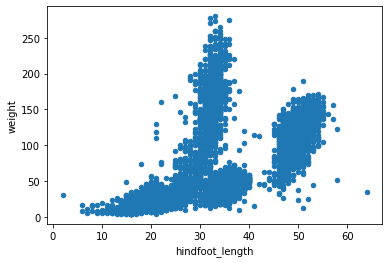

In [4]:
surveys = pd.read_csv("../data/surveys.csv")
my_plot = surveys.plot("hindfoot_length", "weight", kind="scatter")

<div class="alert alert-block alert-success">
<b>TRY IT YOURSELF</b>: Time to play with plots! Look at the pandas.DataFrame.plot() documentation (<a url="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html">here</a>) and change your data visualization selecting different DataFrame columns, x and y axes, and kind of plot (try at least three different kind of plots).
</div>

### Plotting general data

In the next example we will generate our own data getting 1000 normally distributed data points. 

In [5]:
import numpy as np
sample_data = np.random.normal(0, 0.1, 1000)

This time we will use the ```pyplot``` method hist to compute and visualise a histogram of our data.

(array([  1.,  16.,  39., 127., 269., 271., 184.,  71.,  18.,   4.]),
 array([-0.369415  , -0.29813947, -0.22686394, -0.15558841, -0.08431289,
        -0.01303736,  0.05823817,  0.1295137 ,  0.20078923,  0.27206476,
         0.34334029]),
 <BarContainer object of 10 artists>)

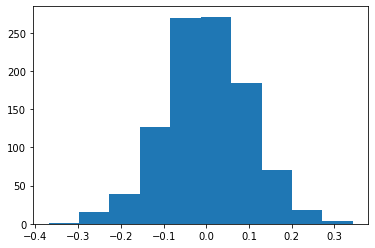

In [7]:
plt.hist(sample_data)

### Matplotlib plot hierarchy

In the previous examples we generage very simple plots to have a quick look at the data. However, with Matplotlib you can control every aspect of your plot: its dimension, x and y ticks and label, making multi-plots in the same area, and many other graphical features.

To get full control of the plots generated with Matplotlib.pyplot, it is important be aware of the hierarchy between pyplot main objects:
<ul>
    <li>At the higher level we have a **Figure**. Figure is simply the total white space where you will organise your plots;</li>
    <li>One of the most confusion Matplotlib convention is that single plots are called **Axes**. You can have a single Axes (still, with final "s") per Figure, so one plot per Figure (see Plot1 on the left) or multiple Axes per Figure, like in Plot2 (on the right) where the same Figure contains three plots distributed in two rows;</li>
    <li>Finally, each Axes (aka plot) contains two **Axis**, i.e. x and y axis.</li>
</ul>

<div>
<img src="pictures/plot_hierarchy.jpeg" width="800"/>
</div>

To initiate at the same time a Figure and a Axes, we can use the method ```plt.subplots()```. Using only the default arguments (like in this first case), the methods will return a Figure and a single Axes object, i.e. a white window and a single plot at the center of it. We will assign to these two python objects the names *fig* and *ax*.<br>
To plot data on our Axes (*as*) we will use the same plotting methods used in the previous examples. In this case, we will use ```hist()``` sampling the data in 30 bins.

(array([  1.,   0.,   0.,   2.,   4.,  10.,   6.,  16.,  17.,  37.,  38.,
         52.,  87.,  82., 100.,  94.,  90.,  87.,  82.,  54.,  48.,  35.,
         21.,  15.,   9.,   7.,   2.,   1.,   2.,   1.]),
 array([-0.369415  , -0.34565649, -0.32189798, -0.29813947, -0.27438096,
        -0.25062245, -0.22686394, -0.20310543, -0.17934692, -0.15558841,
        -0.13182991, -0.1080714 , -0.08431289, -0.06055438, -0.03679587,
        -0.01303736,  0.01072115,  0.03447966,  0.05823817,  0.08199668,
         0.10575519,  0.1295137 ,  0.15327221,  0.17703072,  0.20078923,
         0.22454774,  0.24830625,  0.27206476,  0.29582327,  0.31958178,
         0.34334029]),
 <BarContainer object of 30 artists>)

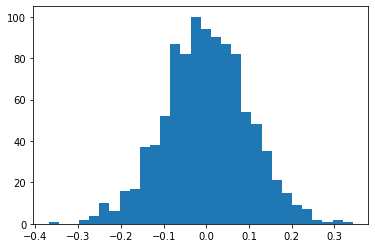

In [8]:
fig, ax = plt.subplots()  # initiate an empty figure and axis matplotlib object
ax.hist(sample_data, 30)

Once we defined a Figure and an Axes, we can add other Axes to our Figure to plot additional data in the same space. This can be done using ```fig.add_axes([left,bottom,right,top])``` where ```add_axes``` is a method that, indeed, ad an additional Axes to our Figure and its argument are the coordinates of our people. Default coordinate units are such that 0 corresponds to the beginning of an axis and 1 to its end. For examples, the list of coordinates [0.5,0.5,1,1] will locate the bottom left corner of our additional Axis at the very center of the Figure and its right top corner at the very top right corner of our Figure.

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.29203635, -0.19203635, -0.09203635,  0.00796365,  0.10796365,
         0.20796365,  0.30796365,  0.40796365,  0.50796365,  0.60796365,
         0.70796365]),
 <BarContainer object of 10 artists>)

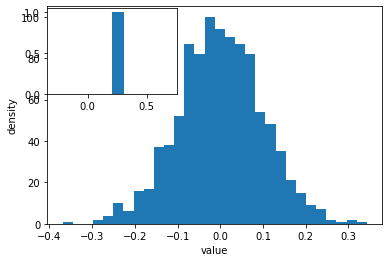

In [9]:
# prepare a matplotlib figure
fig, ax1 = plt.subplots()
ax1.hist(sample_data, 30)
# add labels
ax1.set_ylabel('density')
ax1.set_xlabel('value')

# define and sample beta distribution
a = 5
b = 10
beta_draws = np.random.beta(a, b)

# plot beta distribution
# by adding additional axes to the figure
ax2 = fig.add_axes([0.125, 0.575, 0.3, 0.3])
#ax2 = fig.add_axes([left, bottom, right, top])
ax2.hist(beta_draws)

Axes do not neet to be always added on the go, we can plan the structure of our Figure according to the number of plots we want to display in it. In the following example, we give some more arguments to ```plt.subplots()```. The first two arguments indicate the number of vertical and horizontal plots we want to fit in our Figure. In this case, we want one plot vertically (one row) and one row horizontally (two columns). As we want to be sure that there will be enough space for our two plots, we specify the size of the Figure, 12 inches long and 6 inches high (inches is the default size unit, but you can specify different ones).<br>
Compared to our previous example, this time ```plt.subplots()``` returns a figure and a tuple of Axes. The number of these Axes depends on our orguments. In this case we want plots distributed in one row and two columns, so a total of 2 plots, therefore the returned Axes objects will be 2.

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.1924767, -0.0924767,  0.0075233,  0.1075233,  0.2075233,
         0.3075233,  0.4075233,  0.5075233,  0.6075233,  0.7075233,
         0.8075233]),
 <BarContainer object of 10 artists>)

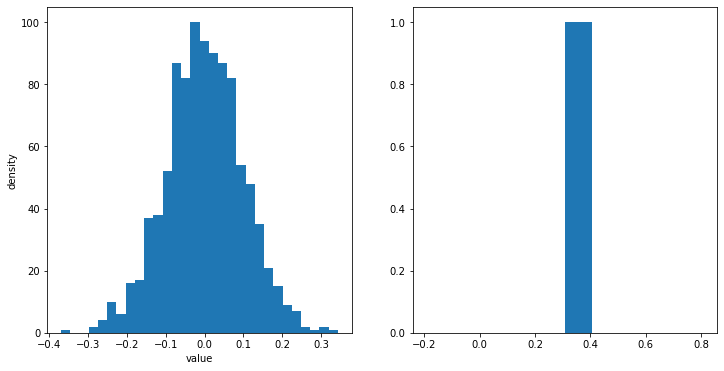

In [10]:
# prepare a matplotlib figure
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.hist(sample_data, 30)
# add labels
ax1.set_ylabel('density')
ax1.set_xlabel('value')

# define and sample beta distribution
a = 5
b = 10
beta_draws = np.random.beta(a, b)

# plot beta distribution
ax2.hist(beta_draws)

### Integrating pandas plot with matplotlib

Let's now go back to our pandas DataFrames. We saw that we can quickly plot data from a pandas DataFrame, but what about I *already* have a Figure with Axes and I want to plot my Dataframe data in it? This examples will show you how.

Text(0.5, 0.98, 'Scatter plot of weight versus hindfoot length')

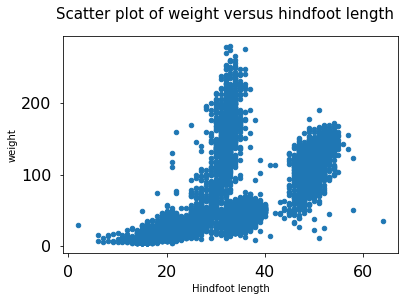

In [38]:
fig, ax1 = plt.subplots() # prepare a matplotlib figure

surveys.plot("hindfoot_length", "weight", kind="scatter", ax=ax1)

# Provide further adaptations with matplotlib:
ax1.set_xlabel("Hindfoot length")
ax1.tick_params(labelsize=16, pad=8)
fig.suptitle('Scatter plot of weight versus hindfoot length', fontsize=15)

As you could see, you just need to specify the argument ```ax=<my_figure_ax>``` to plot the DataFrame data in your Axes.

<div class="alert alert-block alert-success">
<b>TRY IT YOURSELF</b>: Plot DataFrame data in a single Figure:
        <ol>
            <li>Initialize a Figure with 4 Axes distributed in two rows and two columns;</li>
            <li>In each Axis plot DataFrame data of different columns (try also to use different kind of plots);</li>
            <li>Make your Axes (plots) "pretty": label all your axes, use clear character font, choose a nice title for your plot. You may want to consult the <code>Axes.plot()</code> documentation for that (<a url="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html"></a>).
        </ol>
</div>